# Sketchpad

Various experiments with ideology graphs.

In [31]:
# imports and includes
using LightGraphs, MetaGraphs, SNAPDatasets, Random, GraphPlot, Compose, Plots
include("../src/models.jl")   # Graph models
include("../src/dynamics.jl") # Dynamical systems
include("../src/dataviz.jl")  # Plotting for our graphs

drawcolorgraph (generic function with 1 method)

## Simple ideology graphs

Here we do the simple experiments. No quality attribute, 1- and 2-D ideology attributes, various graph generation models. No "media accounts."

### Erdos-Renyi models with a few different parameters. Small models.


In [ ]:
model = ermodel(20, 0.3, IGraph)
assignid!(model)
colornet!(model)
drawcolorgraph(model)

In [ ]:
model2 = copy(model)
drawcolorgraph(model)

### Erdos-Renyi model with media accounts added

In [ ]:
#model = ermodel(30, 0.2, IGraph)
#assignid!(model)
#addmedia_rand!(model, 2, 6, 0.5)
#colornet!(model)
#drawcolorgraph(model)
R = Array{Float64,1}(undef, 100)
for i = 1:100
    model = ermodel(30, 0.2, IGraph)
    assignid!(model)
    addmedia_rand!(model, 2, 6, 0.5)
    R[i] = R_M(model, 0.5, 0.5) / R_0(model, 0.5, 0.5)
end
sum(R) / 100

In [ ]:
model = wsmodel(50, 4, 0.3, IGraph)
assignid!(model)
addmedia_nearest!(model, 2, 5, [-0.9, 0.9])
colornet!(model)
drawcolorgraph(model)

## Timing benchmarks

In [3]:
@time model = ermodel(1000, 0.025, IGraph)

  0.002031 seconds (6.12 k allocations: 961.891 KiB)


IGraph{Int64}({1000, 12367} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), 1, false, var"#3#5"())

In [9]:
@time assignid!(model)

  0.000624 seconds (12.01 k allocations: 1.114 MiB)


In [ ]:
@time addmedia_rand!(model, 10, 20, 0.6)

In [ ]:
@time updateg2!(model, 0.5)

In [ ]:
function updateg2!(g::IGraph, c)
    newids = Array{Float64, 1}()

    # for v in vertices(g.g) append!(newids, id_update(g, v, c)) end
    newids = [id_update(g,v,c) for v in vertices(g.g)]
    m = maximum([newids[v] - props(g.g, v)[:ideology] for v in vertices(g.g)])
    for v in vertices(g.g)
        if !has_prop(g.g, v, :media)
            set_prop!(g.g, v, :ideology, newids[v])
        end
    end
    (newids, m)
end

In [ ]:
@time id_update(model, 1, 0.5)

In [ ]:
function id_update2(g::IGraph, v, c, selfweight = 1)
    selfid = props(g.g, v)[:ideology]
    newid = selfid * selfweight
    n = 0
    for w in neighbors(g.g, v)
        i = props(g.g, w)[:ideology]
        if g.distance(i, selfid) <= c
            newid += i
            n += 1
        end
    end
    newid / (n + selfweight)
end

In [ ]:
@time id_update2(model, 1, 0.5)

In [35]:
@time fullsim!(model, 0.5)

  0.001218 seconds (20.52 k allocations: 2.223 MiB)


122×2 Array{Float64,2}:
  0.0115531   0.0115645
  0.0115457   0.0115606
  0.0115896   0.0115847
  0.0115713   0.0115739
  0.0115158   0.0115447
  0.0115452   0.01156  
  0.0116031   0.0115919
  0.0115777   0.0115775
  0.0115636   0.0115707
  0.0115604   0.0115687
  0.011577    0.0115778
  0.0115974   0.0115884
  0.0115669   0.0115721
  ⋮                    
  0.0115614   0.011569 
  0.0115684   0.0115738
  0.0115589   0.0115675
  0.0115347   0.0115542
  0.0115864   0.0115832
  0.0115665   0.0115719
  0.0115539   0.0115653
  0.0115999   0.0115903
  0.0115916   0.0115851
  0.0115736   0.0115756
  0.8         0.8      
 -0.8        -0.8      

In [11]:
[props(model.g, i)[:ideology] for i = 1:nv(model.g)]

1000-element Array{Float64,1}:
 -22.052                 
  -3.896                 
  35.81                  
   1.6219999999999997    
   1.3158125696247362e301
 -12.718                 
   0.40199999999999997   
  -8.57                  
  37.494                 
  13.722000000000001     
  94.688                 
   4.721870554718084e301 
  -4.09                  
   ⋮                     
   7.824000000000001     
  -5.678                 
   6.062                 
   3.29                  
 -63.768                 
  -1.7178961744713832e301
   6.45664298975265e301  
  -9.498000000000001     
  -2.506                 
   6.166                 
 -13.376000000000001     
   8.276                 

In [ ]:
function fullsim_blank!(g::IGraph, c, tol = 10^(-4), maxsteps = 1000)
    m = 1
    #ids = [props(g.g, v)[:ideology] for v in vertices(g.g)]
    steps = 0
    while m > tol && steps < maxsteps
        m = updateg!(g, c)[2]
    end
    return true
end

In [ ]:
model = ermodel(250, 0.3, IGraph)
assignid!(model)
addmedia_rand!(model, 10, 20, 0.6)
@time modelb = copy(model)

In [ ]:
@time fullsim_blank!(model, 0.5)

In [ ]:
@time fullsim!(modelb, 0.5)

## Simple dynamical experiments

In a simple ER model all but the most extreme accounts homogenize to a fairly neutral ideology. In sufficiently connected graphs, or with a large enough acceptance parameter, all accounts will generally homogenize.

In [32]:
model = ermodel(20, 0.3, IGraph)
assignid!(model)
ids = fullsim!(model, 0.5)


20×36 Array{Float64,2}:
 -0.9  -0.75       -0.65        …  0.039856   0.0398197  0.0397968
 -0.5  -0.6        -0.603333       0.0395469  0.0396214  0.0396694
 -0.6  -0.55       -0.575          0.0397645  0.0397624  0.0397607
  0.8   0.7         0.7125         0.0397012  0.03972    0.0397323
  0.7   0.633333    0.4775         0.0399293  0.03987    0.039831 
 -0.2  -0.4        -0.4125      …  0.0397251  0.0397372  0.0397447
 -0.1  -0.0666667   0.0377778      0.039867   0.0398281  0.0398028
  0.0   0.216667    0.234762       0.0398575  0.0398221  0.0397991
  0.9   0.8         0.716667       0.0397867  0.0397776  0.039771 
  0.2   0.075       0.0333333      0.0398188  0.0397959  0.0397814
 -0.3  -0.1        -0.0463333   …  0.0398628  0.0398249  0.0398005
 -1.0  -0.733333   -0.688889       0.0393922  0.039521   0.0396043
  0.3   0.26        0.194722       0.0399067  0.0398544  0.0398203
  0.5   0.3         0.352083       0.0396055  0.0396587  0.0396929
  0.6   0.725       0.63125        0.0

In [17]:
ids

0.6

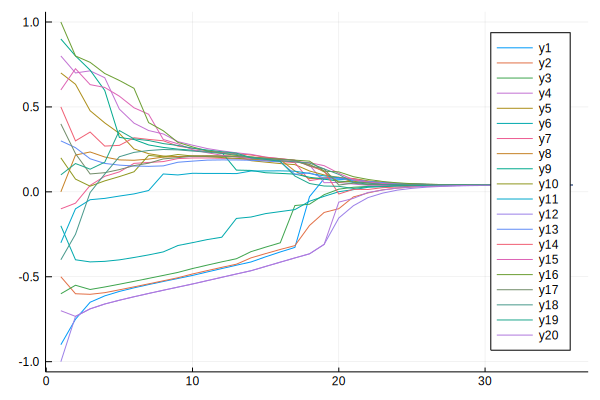

In [33]:
plot(1:size(ids)[2],transpose(ids))

In [ ]:
colornet!(model)
drawcolorgraph(model)

In [ ]:
model = ermodel(60, 0.1, IGraph)
assignid!(model)
ids, steps = fullsim!(model, 0.9)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [ ]:
colornet!(model)
drawcolorgraph(model)

In the presence of a media account, many accounts will become "entrained" to the media account. A handful of accounts may retain different ideology.

┌ Info: Saved animation to 
│   fn = /home/dylan/code/IdeologyGraphs/notebooks/tmp.gif
└ @ Plots /home/dylan/.julia/packages/Plots/12uaJ/src/animation.jl:98


Plots.AnimatedGif("/home/dylan/code/IdeologyGraphs/notebooks/tmp.gif")
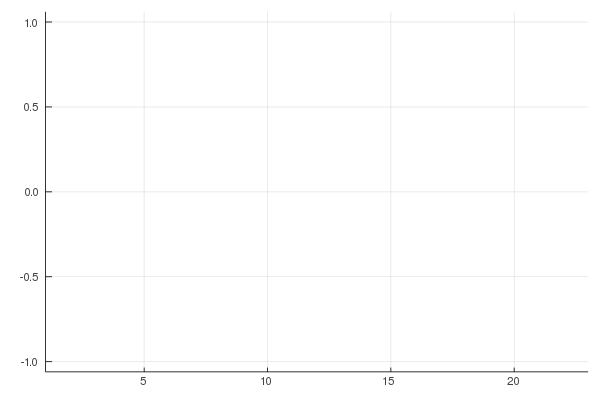

In [34]:
model = ermodel(120, 0.1, IGraph)
assignid!(model)
addmedia_nearest!(model, 1, 12, [0.8])
addmedia_nearest!(model, 1, 12, [-0.8])
ids = fullsim!(model, 0.5)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]), legend = nothing)
end

In [22]:
model = ermodel(20, 0.3, IGraph)
assignid!(model)
#addmedia_rand!(model, 1, 12, 0.8)
#addmedia_rand!(model, 1, 12, -0.8)
ids = fullsim!(model, 0.5)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]), legend = nothing)
end

InterruptException: InterruptException:

In [ ]:
model = wsmodel(100, 8, 0.5, IGraph)
assignid!(model)
addmedia_nearest!(model, 1, 12, [0.8])
addmedia_nearest!(model, 1, 12, [-0.8])
ids, steps = fullsim!(model, 0.5, 10^(-4), 1000)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [ ]:
model = wsmodel(100, 8, 0.5, IGraph)
assignid!(model)
addmedia_rand!(model, 2, 12, 0.6)
addmedia_rand!(model, 2, 12, -0.6)
ids, steps = fullsim!(model, 0.5, 10^(-4), 1000)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [ ]:
model = SNAPIdeog(:ego_twitter_u, IGraph)
assignid!(model)
addmedia_nearest!(model, 10, 1000, [0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7])
addmedia_nearest!(model, 10, 1000, [-0.3, -0.3, -0.3, -0.5, -0.5, -0.5, -0.5, -0.7, -0.7, -0.7])

In [ ]:
ids, steps = fullsim!(model, 0.5, 10^(-4), 300)

In [ ]:
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [ ]:
verts = random_verts(model.g, 500)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, verts], xlims=(1, size(ids)[2]), legend = nothing)
end